## Explore donations data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_donations = pd.read_csv("data/donations.csv")

In [3]:
data_donations.describe()

,Contribution (in euro),personal_ID,company
count,32224.000000,3.222400e+04,32224.000000
mean,74.797516,4.438872e+05,0.049125
std,541.462464,4.090012e+05,0.216132
min,0.010000,1.723820e+05,0.000000
25%,5.000000,1.736370e+05,0.000000
50%,12.500000,2.854220e+05,0.000000
75%,33.000000,4.777130e+05,0.000000
max,28000.000000,2.133989e+06,1.000000


In [4]:
data_donations.columns = ['ds', 'contribution', 'frequency', 'resource', 'personalID', 'company']
data_donations.tail()

,ds,contribution,frequency,resource,personalID,company
32219,2017-12-29,5.00,monthly,Spendenformular,2070368,0
32220,2017-12-29,2.75,monthly,Spendenformular,2071041,0
32221,2017-12-29,193.00,once,Spendenformular,2069663,0
32222,2017-12-29,25.00,once,Dauerspende,286521,0
32223,2017-12-29,50.00,once,Spendenformular,408832,0


In [5]:
# exclude donations by companys
data_donations = data_donations.query("company==0")

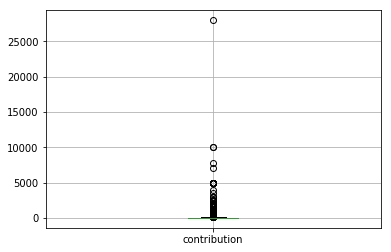

In [6]:
data_donations[["contribution"]].boxplot()

In [7]:
data_donations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 0 to 32223
Data columns (total 6 columns):
ds              30641 non-null object
contribution    30641 non-null float64
frequency       30641 non-null object
resource        30632 non-null object
personalID      30641 non-null int64
company         30641 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


### transform "Received" column to pandas date index

In [8]:
data_donations.ds = pd.to_datetime(data_donations.ds)
data_donations.set_index('ds', inplace=True)

In [9]:
data_donations.tail()

,contribution,frequency,resource,personalID,company
ds,,,,,
2017-12-29,5.00,monthly,Spendenformular,2070368,0
2017-12-29,2.75,monthly,Spendenformular,2071041,0
2017-12-29,193.00,once,Spendenformular,2069663,0
2017-12-29,25.00,once,Dauerspende,286521,0
2017-12-29,50.00,once,Spendenformular,408832,0


In [10]:
#don_week = pd.DataFrame(donations_private.groupby(['year_week'])['Contribution (in euro)'].sum())
donations = pd.DataFrame(data_donations.groupby(["ds"])["contribution"].sum())
donations.tail()

,contribution
ds,
2017-12-21,2467.22
2017-12-22,5939.25
2017-12-27,20440.06
2017-12-28,11829.75
2017-12-29,5741.75


In [11]:
start_date = '01/01/2015'
end_date = '31/12/2017'
dateTimeId = pd.date_range(start=start_date, end=end_date)
data_output_just_index = pd.DataFrame(index=pd.to_datetime(dateTimeId))

In [12]:
data_output_just_index.head()

""
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05


In [13]:
donations.head()

,contribution
ds,
2015-01-02,4123.54
2015-01-05,3770.99
2015-01-06,563.50
2015-01-07,141.00
2015-01-08,936.00


In [14]:
donations = pd.concat([data_output_just_index, donations], axis=1).replace({np.nan:0})
donations.tail()

,contribution
2017-12-27,20440.06
2017-12-28,11829.75
2017-12-29,5741.75
2017-12-30,0.00
2017-12-31,0.00


In [15]:
#start_date = '01/01/2015'
#end_date = '31/12/2017'
#date_range = pd.date_range(start=start_date, end=end_date)
#donations = pd.DataFrame(index=pd.to_datetime(date_range))

In [16]:
#donations = data_donations[["contribution"]].groupby("ds")
#donations.tail()

In [17]:
#data_donations.head()

In [18]:
#donations = data_donations[["contribution"]]
#donations.tail()

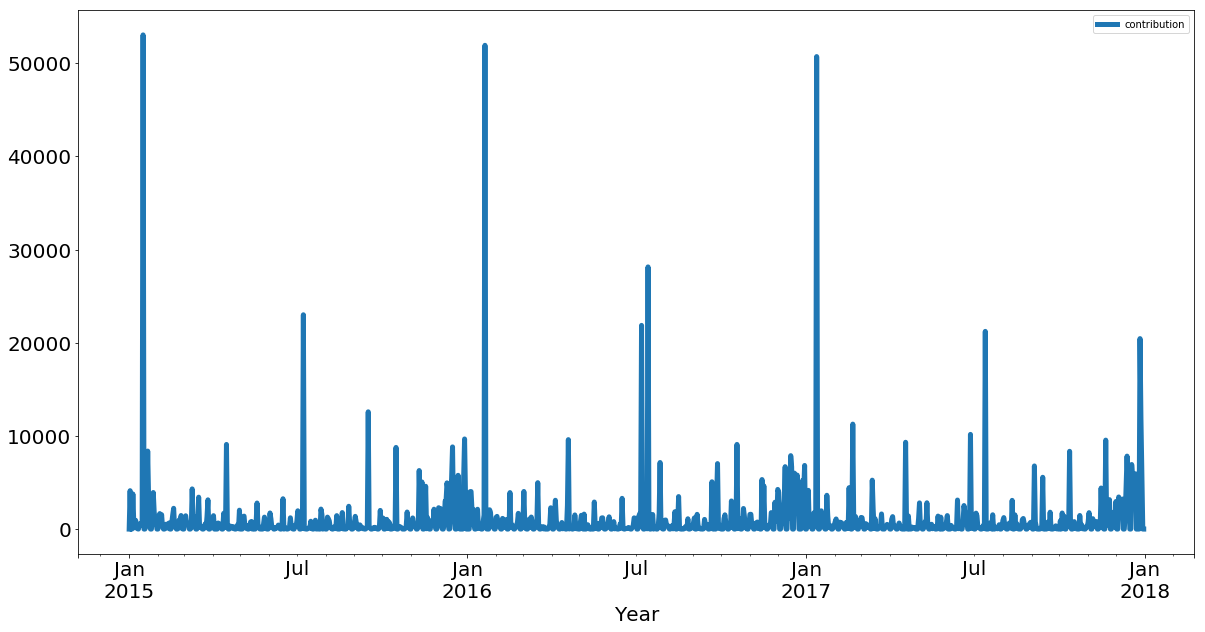

In [19]:
donations.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Additive time series analysis with prophet

In [21]:
import fbprophet

In [22]:
# Prophet requires columns ds (Date) and y (value)
donations.reset_index(level=0, inplace=True)

In [23]:
donations.columns = ["ds","y"]
donations.tail()

,ds,y
1091,2017-12-27,20440.06
1092,2017-12-28,11829.75
1093,2017-12-29,5741.75
1094,2017-12-30,0.00
1095,2017-12-31,0.00


In [24]:
# Make the prophet model and fit on the data
donations_prophet = fbprophet.Prophet()
donations_prophet.fit(donations)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Frederik/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [25]:
# Make a future dataframe for 2 years
future = donations_prophet.make_future_dataframe(periods=365 * 1, freq='D')
# Make predictions
donations_forecast = donations_prophet.predict(future)

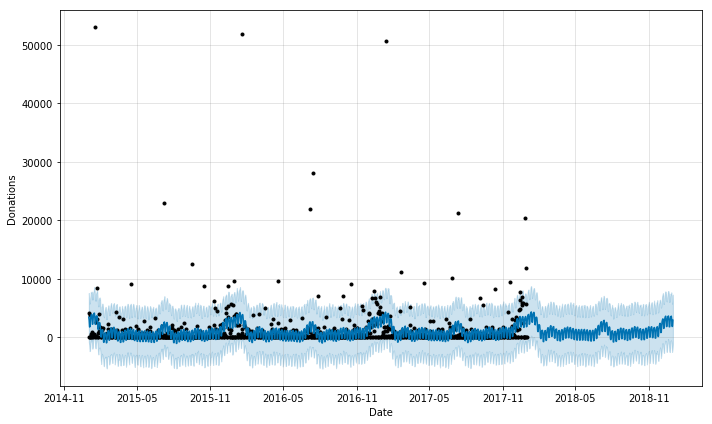

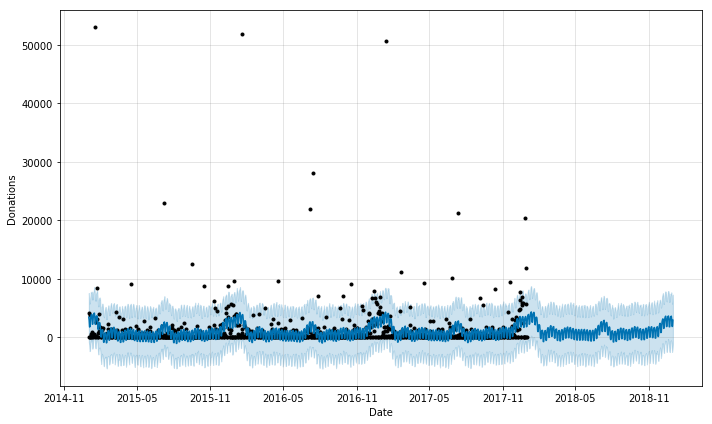

In [26]:
donations_prophet.plot(donations_forecast, xlabel = 'Date', ylabel = 'Donations')

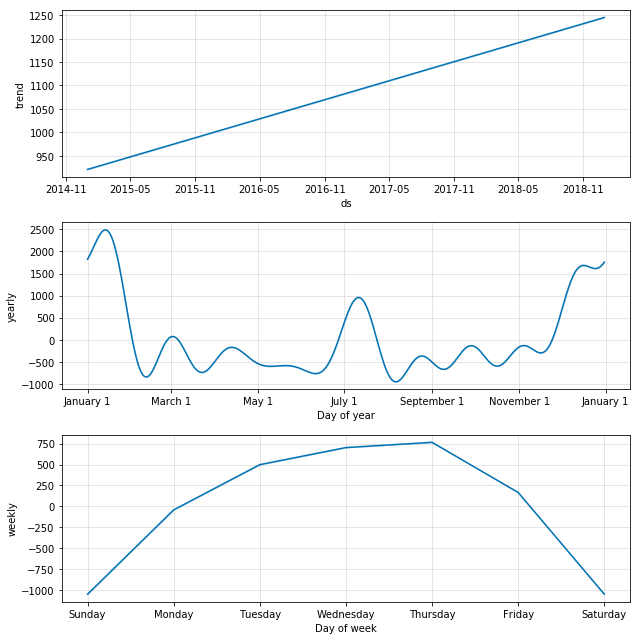

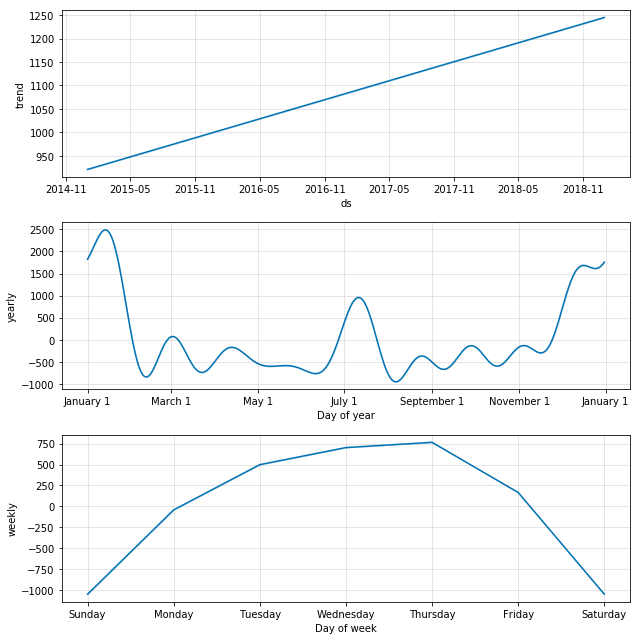

In [27]:
# Plot the trends and patterns
donations_prophet.plot_components(donations_forecast)

### Calculate residuals from donations

In [28]:
donations.tail()

,ds,y
1091,2017-12-27,20440.06
1092,2017-12-28,11829.75
1093,2017-12-29,5741.75
1094,2017-12-30,0.00
1095,2017-12-31,0.00


In [29]:
donations_forecast.describe()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03,1.461000e+03,1.461000e+03,1461.000000
mean,1082.894137,1082.893444,1082.894888,-3093.710541,5258.991198,-0.821558,-0.821558,-0.821558,-0.821558,-0.821558,-0.821558,-0.821558,-0.821558,-0.821558,-9.266139e-13,-9.266139e-13,-9.266139e-13,1082.072579
std,93.582413,93.581379,93.583535,1138.987362,1137.968277,1123.054806,1123.054806,1123.054806,1123.054806,1123.054806,1123.054806,711.702917,711.702917,711.702917,8.704519e+02,8.704519e+02,8.704519e+02,1126.434534
min,920.994431,920.994431,920.994431,-5334.559445,2809.988341,-1999.958471,-1999.958471,-1999.958471,-1999.958471,-1999.958471,-1999.958471,-1045.854758,-1045.854758,-1045.854758,-9.542754e+02,-9.542754e+02,-9.542754e+02,-1020.920375
25%,1001.932812,1001.932812,1001.932812,-3801.432084,4522.472550,-673.762300,-673.762300,-673.762300,-673.762300,-673.762300,-673.762300,-1045.373399,-1045.373399,-1045.373399,-5.919611e+02,-5.919611e+02,-5.919611e+02,387.058804
50%,1082.876331,1082.876331,1082.876331,-3128.556610,5230.332737,-37.724415,-37.724415,-37.724415,-37.724415,-37.724415,-37.724415,166.952888,166.952888,166.952888,-3.120895e+02,-3.120895e+02,-3.120895e+02,1050.064840
75%,1163.852417,1163.852417,1163.852417,-2524.895523,5811.249993,529.493382,529.493382,529.493382,529.493382,529.493382,529.493382,701.933675,701.933675,701.933675,1.421526e+02,1.421526e+02,1.421526e+02,1611.692723
max,1244.847778,1244.840442,1244.855730,412.577403,8770.458965,3255.149332,3255.149332,3255.149332,3255.149332,3255.149332,3255.149332,764.660423,764.660423,764.660423,2.491143e+03,2.491143e+03,2.491143e+03,4365.427983


In [30]:
donations_forecast[["ds", "yhat"]].tail()

,ds,yhat
1456,2018-12-27,3636.351548
1457,2018-12-28,3056.604889
1458,2018-12-29,1870.261980
1459,2018-12-30,1903.945284
1460,2018-12-31,2951.321270


In [31]:
# merge real datapoints with forecast
donations_residual = pd.merge(left=donations, left_index=True, right=donations_forecast[["yhat"]], right_index=True)

In [35]:
donations_residual["residual"] = donations_residual["y"]-donations_residual["yhat"]
donations_residual.describe()

,y,yhat,residual
count,1096.000000,1096.000000,1096.000000
mean,1039.442929,1041.756102,-2.313173
std,3454.763618,1124.953029,3266.431344
min,0.000000,-1020.920375,-4121.930242
25%,0.000000,350.102586,-1001.111851
50%,184.500000,1008.359772,-360.966631
75%,770.727500,1571.394777,412.281623
max,53027.360000,4323.324505,49476.743744


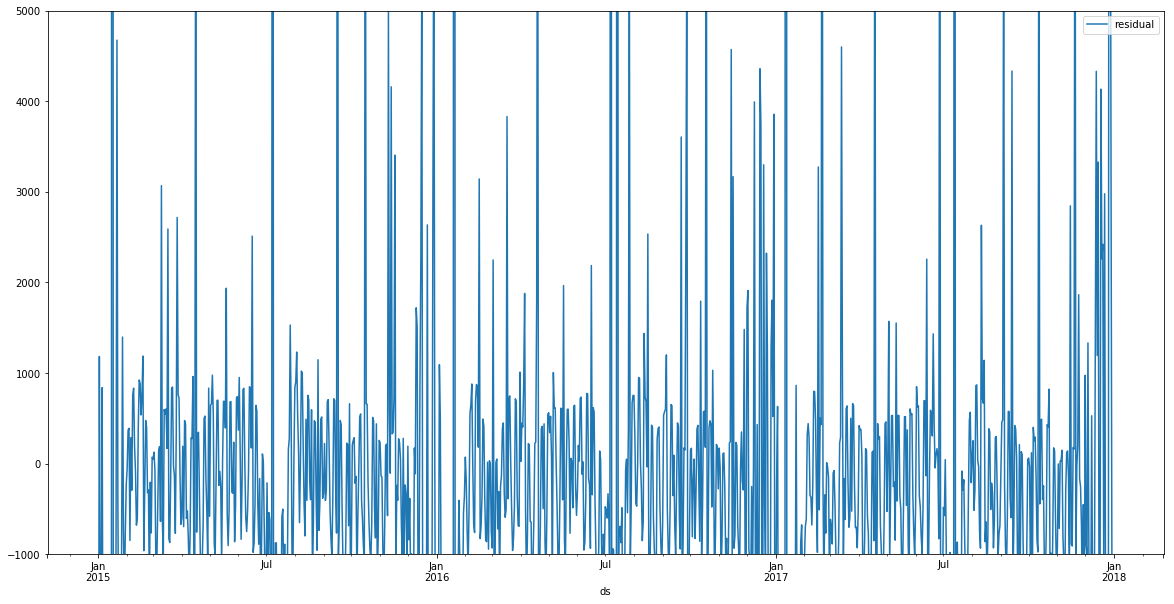

In [36]:
donations_residual.plot(x="ds", y="residual", figsize=(20,10), ylim=(-1000, 5000))

### Prepare TV ads in similar column format

In [37]:
data_media = pd.read_csv("data/Media.csv", delimiter=';')

In [38]:
dict_monat_to_number={
    'Januar' : '01',
    'Februar' : '02',
    'März' : '03',
    'April': '04',
    'Mai': '05',
    'Juni': '06',
    'Juli': '07',
    'August': '08',
    'September': '09',
    'Oktober': '10',
    'November': '11',
    'Dezember': '12',
}
data_media['_Month'] = data_media.Month.map(dict_monat_to_number)
data_media['_Day'] = data_media.Day.replace({0:1})
data_media['date'] = pd.to_datetime(data_media.Year.astype(str) \
                                    +'/'+ data_media._Month \
                                    +'/'+ data_media._Day.astype(str))
data_media.set_index('date', inplace=True)

In [39]:
data_media.tail()

,Year,Month,Day,Agency,Article,Type,MediaType,CFD,CFV,_Month,_Day
date,,,,,,,,,,,
2017-04-01,2017,April,0,RTL Punkt 12,Ehrenamtliche veruntreuen Lebenesmittel,t,TV,0,0,04,1
2017-04-01,2017,April,0,RTL Explosiv,Ehrenamtliche veruntreuen Lebenesmittel,t,TV,0,0,04,1
2017-04-01,2017,April,0,rbb Abendschau,RTL Vorwürfe,t,TV,0,0,04,1
2017-04-01,2017,April,0,rbb Abendschau,RTL Vorwürfe,t,TV,0,0,04,1
2017-09-01,2017,September,0,Tagesschau,Bundestagswahl Familienpolitik,t,TV,0,0,09,1


In [40]:
temp_data_media = data_media.groupby(['date','MediaType']).size().unstack(fill_value=0)

In [41]:
data_output = pd.concat([data_output_just_index, temp_data_media], axis=1).replace({np.nan:0})

In [42]:
data_output.query("TV>0")

,Online,Print,RADIO,TV
2015-01-01,2.0,2.0,7.0,2.0
2015-03-01,1.0,1.0,0.0,1.0
2015-05-01,0.0,0.0,1.0,2.0
2015-06-01,1.0,2.0,0.0,1.0
2015-08-01,0.0,0.0,0.0,2.0
2015-10-01,2.0,2.0,1.0,2.0
2015-11-01,0.0,0.0,0.0,1.0
2016-01-01,0.0,1.0,2.0,3.0
2016-02-01,0.0,2.0,1.0,1.0
2016-03-01,0.0,1.0,2.0,1.0


## Calculate cross-correlation between donations and TV ads series 

In [64]:
donations_residual_tv = donations_residual.set_index("ds")
data_output['residual'] = donations_residual.set_index("ds")

#donations_residual_tv["TV"] = data_output["TV"]

#donations_residual_tv.query("TV>0")


In [66]:
donations_residual.columns

Index(['ds', 'y', 'yhat', 'residual', 'TV'], dtype='object')

In [65]:
data_output.head()

,Online,Print,RADIO,TV,residual
2015-01-01,2.0,2.0,7.0,2.0,0.00
2015-01-02,0.0,4.0,0.0,0.0,4123.54
2015-01-03,4.0,7.0,0.0,0.0,0.00
2015-01-04,2.0,3.0,0.0,0.0,0.00
2015-01-05,1.0,6.0,0.0,0.0,3770.99


In [63]:
for variable in data_output.columns:
    print(variable)
    print(data_output[["residual", variable]].corr())
    print('number of event', data_output[variable].sum())


Online
          residual    Online
residual  1.000000 -0.015584
Online   -0.015584  1.000000
number of event 390.0
Print
          residual     Print
residual  1.000000  0.000887
Print     0.000887  1.000000
number of event 481.0
RADIO
          residual     RADIO
residual  1.000000 -0.041505
RADIO    -0.041505  1.000000
number of event 33.0
TV
          residual        TV
residual  1.000000 -0.019741
TV       -0.019741  1.000000
number of event 26.0
residual
          residual  residual
residual       1.0       1.0
residual       1.0       1.0
number of event -2535.237361936972


In [61]:
data_output[["residual", "Print"]].corr()

,residual,Print
residual,1.000000,0.000887
Print,0.000887,1.000000
